In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import import_ipynb
import Lib.Functions as fc
warnings.filterwarnings('ignore')

importing Jupyter notebook from /Users/admin/Desktop/Adaptive Engine/Lib/Functions.ipynb


In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
label = 'Survived'
selected_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [4]:
null_row = df.loc[df['Embarked'].isnull()].index.tolist()
df = df.drop(null_row)

In [5]:
rnd = np.random.RandomState(seed = 42)

df['Random_num'] = rnd.randn(df.shape[0])
df['Random_cat'] = rnd.randint(3, size = df.shape[0])

In [6]:
df['Random_cat'].value_counts()

1    314
0    295
2    280
Name: Random_cat, dtype: int64

----- Random_num -----
count    889.000000
mean       0.010657
std        0.981835
min       -3.241267
25%       -0.651836
50%        0.012592
75%        0.633919
max        3.852731
Name: Random_num, dtype: float64
* Median: 0.01259240078179486
* Skewness: 0.16153895824894116
* Kurtosis: 0.12116687063029463
* Percentage of outliers: 0.010123734533183352
* Number of missing value: 0


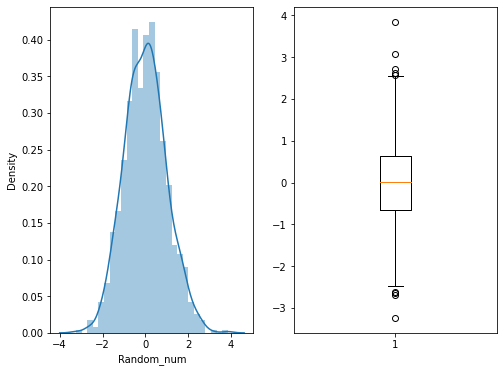

In [7]:
fc.continuous_analysis(df, 'Random_num')

In [8]:
X = df[selected_cols + ['Random_num'] + ['Random_cat']]
y = df[label]

In [9]:
X.loc[X['Age'].isnull(), 'Age'] = np.round(X['Age'].mean(), 2)

In [10]:
X['Sex'] = X['Sex'].map(lambda x: 0 if x == 'female' else 1)

In [11]:
def transform(x):
    if x == 'Q':
        return 0
    elif x == 'C':
        return 1
    else:
        return 2

In [12]:
X['Embarked'] = X['Embarked'].map(lambda x: transform(x))

In [13]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)
forest_clf = forest.fit(X_train, y_train)

forest_clf.score(X_train, y_train)

1.0

In [16]:
fc.eval_clf_testset(forest_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8258

* Confusion Matrix of Test: 
[[97 13]
 [18 50]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.74      0.76        68

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



In [17]:
rf_imp = pd.DataFrame({'Features': X_train.columns, 
                       'Importances': forest_clf.feature_importances_}).sort_values(by = 'Importances', ascending = False)
rf_imp

,Features,Importances
1,Sex,0.260160
5,Fare,0.189957
7,Random_num,0.165408
2,Age,0.157964
0,Pclass,0.080377
8,Random_cat,0.042648
3,SibSp,0.039472
6,Embarked,0.033678
4,Parch,0.030337


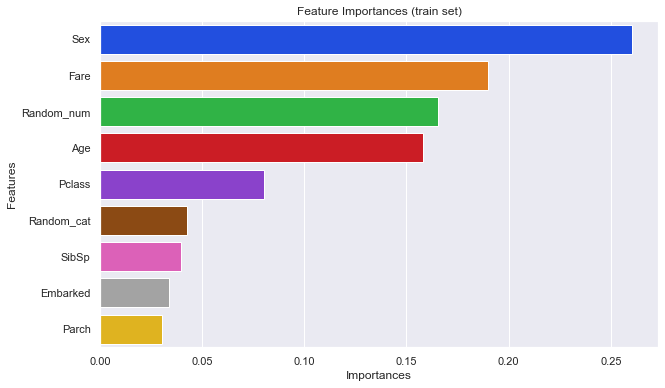

In [54]:
sb.set_theme()
sb.set_palette('bright')
plt.figure(figsize = (10, 6))
sb.barplot(data = rf_imp, x = 'Importances', y = 'Features')
plt.title("Feature Importances (train set)");

In [49]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest_clf, X_test, y_test, n_repeats = 10, random_state = 42)

In [50]:
imp_order = result.importances_mean.argsort()
imp_order

array([6, 3, 8, 7, 4, 5, 2, 0, 1])

In [51]:
importances = pd.DataFrame(
    result.importances[imp_order].T,
    columns=X.columns[imp_order],)
importances

,Embarked,SibSp,Random_cat,Random_num,Parch,Fare,Age,Pclass,Sex
0,-0.005618,0.005618,0.022472,0.016854,0.011236,0.044944,0.106742,0.073034,0.168539
1,0.000000,-0.011236,-0.016854,0.000000,0.028090,0.033708,0.061798,0.073034,0.219101
2,0.000000,-0.005618,0.000000,0.050562,0.011236,0.033708,0.078652,0.084270,0.179775
3,-0.011236,0.005618,0.005618,-0.016854,0.016854,0.044944,0.089888,0.067416,0.162921
4,0.005618,-0.005618,0.005618,-0.005618,0.011236,0.016854,0.067416,0.106742,0.146067
5,-0.016854,0.016854,0.000000,0.011236,0.005618,0.033708,0.039326,0.084270,0.213483
6,0.000000,-0.016854,0.000000,0.005618,0.016854,0.044944,0.078652,0.089888,0.174157
7,-0.011236,0.000000,-0.005618,0.011236,0.016854,0.011236,0.095506,0.067416,0.146067
8,0.000000,0.005618,0.016854,0.016854,0.011236,0.050562,0.067416,0.089888,0.213483
9,-0.005618,0.005618,0.022472,0.022472,0.016854,0.044944,0.067416,0.089888,0.151685


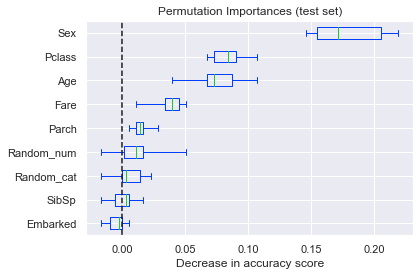

In [52]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score");
ax.figure.tight_layout()

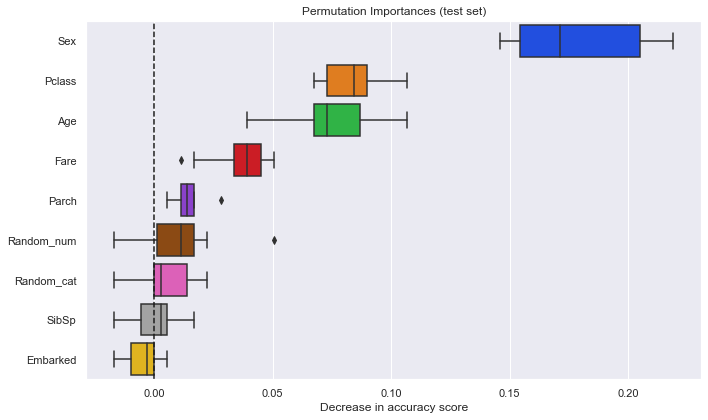

In [53]:
sb.set_palette('bright')
plt.figure(figsize = (10, 6))
ax = sb.boxplot(data = importances[importances.columns[::-1]], orient = 'h')
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score");
ax.figure.tight_layout()

In [24]:
importances['Sex'].mean()

0.17752808988764046

In [25]:
result

{'importances_mean': array([ 8.25842697e-02,  1.77528090e-01,  7.52808989e-02,  1.11022302e-17,
         1.46067416e-02,  3.59550562e-02, -4.49438202e-03,  1.12359551e-02,
         5.05617978e-03]),
 'importances_std': array([0.01179775, 0.02696629, 0.01815224, 0.00940067, 0.00572924,
        0.01235955, 0.00655163, 0.01722439, 0.01190428]),
 'importances': array([[ 0.07303371,  0.07303371,  0.08426966,  0.06741573,  0.10674157,
          0.08426966,  0.08988764,  0.06741573,  0.08988764,  0.08988764],
        [ 0.16853933,  0.21910112,  0.17977528,  0.16292135,  0.14606742,
          0.21348315,  0.1741573 ,  0.14606742,  0.21348315,  0.15168539],
        [ 0.10674157,  0.06179775,  0.07865169,  0.08988764,  0.06741573,
          0.03932584,  0.07865169,  0.09550562,  0.06741573,  0.06741573],
        [ 0.00561798, -0.01123596, -0.00561798,  0.00561798, -0.00561798,
          0.01685393, -0.01685393,  0.        ,  0.00561798,  0.00561798],
        [ 0.01123596,  0.02808989,  0.0112359

In [26]:
imp_order = result.importances_mean.argsort()[::-1]
imp_order

array([1, 0, 2, 5, 4, 7, 8, 3, 6])

In [27]:
toplimit = len(imp_order)
toplimit

9

In [28]:
for i, _ in zip(imp_order, range(toplimit)):
    name = X.columns[i]
    print(i, name, _)

1 Sex 0
0 Pclass 1
2 Age 2
5 Fare 3
4 Parch 4
7 Random_num 5
8 Random_cat 6
3 SibSp 7
6 Embarked 8


In [29]:
for i, _ in zip(imp_order, np.sort(result.importances_mean)[::-1]):
    name = X.columns[i]
    print(i, name, _)

1 Sex 0.17752808988764046
0 Pclass 0.08258426966292137
2 Age 0.07528089887640452
5 Fare 0.03595505617977528
4 Parch 0.014606741573033743
7 Random_num 0.011235955056179803
8 Random_cat 0.005056179775280922
3 SibSp 1.1102230246251566e-17
6 Embarked -0.00449438202247191


In [30]:
for index in imp_order:
    name = X.columns[index]
    print(index, name)

1 Sex
0 Pclass
2 Age
5 Fare
4 Parch
7 Random_num
8 Random_cat
3 SibSp
6 Embarked


In [31]:
result_train = permutation_importance(forest_clf, X_train, y_train, n_repeats = 10, random_state = 42)

In [32]:
imp_train = result_train.importances_mean.argsort()[::-1]
imp_train

array([1, 0, 2, 5, 7, 8, 6, 3, 4])

In [33]:
demo = pd.DataFrame()
for idx, value in zip(imp_train, np.sort(result_train.importances_mean)[::-1]):
    name = X.columns[idx]
    print(idx, name, value)
    demo[name] = value

1 Sex 0.26230661040787623
0 Pclass 0.15218002812939524
2 Age 0.11856540084388185
5 Fare 0.11153305203938117
7 Random_num 0.07862165963431786
8 Random_cat 0.041350210970464166
6 Embarked 0.036708860759493686
3 SibSp 0.031504922644163144
4 Parch 0.012798874824191253


In [34]:
demo

,Sex,Pclass,Age,Fare,Random_num,Random_cat,Embarked,SibSp,Parch


In [35]:
importances = pd.DataFrame(
    result.importances[imp_order].T,
    columns=X.columns[imp_order],)
importances

,Sex,Pclass,Age,Fare,Parch,Random_num,Random_cat,SibSp,Embarked
0,0.168539,0.073034,0.106742,0.044944,0.011236,0.016854,0.022472,0.005618,-0.005618
1,0.219101,0.073034,0.061798,0.033708,0.028090,0.000000,-0.016854,-0.011236,0.000000
2,0.179775,0.084270,0.078652,0.033708,0.011236,0.050562,0.000000,-0.005618,0.000000
3,0.162921,0.067416,0.089888,0.044944,0.016854,-0.016854,0.005618,0.005618,-0.011236
4,0.146067,0.106742,0.067416,0.016854,0.011236,-0.005618,0.005618,-0.005618,0.005618
5,0.213483,0.084270,0.039326,0.033708,0.005618,0.011236,0.000000,0.016854,-0.016854
6,0.174157,0.089888,0.078652,0.044944,0.016854,0.005618,0.000000,-0.016854,0.000000
7,0.146067,0.067416,0.095506,0.011236,0.016854,0.011236,-0.005618,0.000000,-0.011236
8,0.213483,0.089888,0.067416,0.050562,0.011236,0.016854,0.016854,0.005618,0.000000
9,0.151685,0.089888,0.067416,0.044944,0.016854,0.022472,0.022472,0.005618,-0.005618


In [36]:
result_train.importances[imp_train].T.shape

(10, 9)

In [37]:
demo1 = pd.DataFrame(result_train.importances[imp_train].T,
                     columns = X.columns[imp_train])
demo1

,Sex,Pclass,Age,Fare,Random_num,Random_cat,Embarked,SibSp,Parch
0,0.254571,0.154712,0.130802,0.120956,0.082982,0.045007,0.039381,0.023910,0.012658
1,0.278481,0.157525,0.113924,0.104079,0.075949,0.047820,0.035162,0.023910,0.015471
2,0.248945,0.163150,0.127989,0.102672,0.074543,0.030942,0.036568,0.039381,0.014065
3,0.261603,0.142053,0.098453,0.111111,0.085795,0.039381,0.042194,0.032349,0.018284
4,0.265823,0.137834,0.106892,0.108298,0.070323,0.030942,0.033755,0.039381,0.012658
5,0.270042,0.158931,0.116737,0.111111,0.075949,0.040788,0.032349,0.037975,0.012658
6,0.257384,0.157525,0.135021,0.115331,0.078762,0.045007,0.037975,0.030942,0.009845
7,0.251758,0.144866,0.112518,0.115331,0.082982,0.042194,0.039381,0.026723,0.007032
8,0.264416,0.165963,0.125176,0.118143,0.080169,0.045007,0.036568,0.028129,0.014065
9,0.270042,0.139241,0.118143,0.108298,0.078762,0.046414,0.033755,0.032349,0.011252


In [38]:
demo1['Sex'].mean()

0.26230661040787623

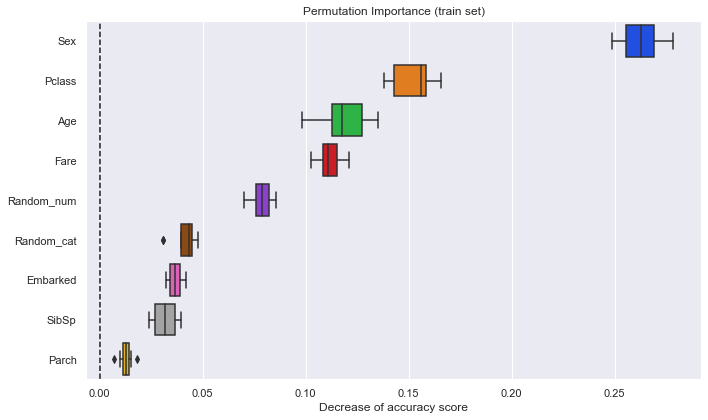

In [39]:
sb.set_palette('bright')
plt.figure(figsize = (10, 6))
ax = sb.boxplot(data = demo1, orient = 'h')
ax.axvline(x = 0, color = 'k', linestyle = '--')
ax.set_title('Permutation Importance (train set)')
ax.set_xlabel('Decrease of accuracy score')
ax.figure.tight_layout();

In [40]:
import xgboost as xgb

xgbs = xgb.XGBClassifier(random_state = 42, max_depth = 15, )
xgb_clf = xgbs.fit(X_train, y_train)

xgb_clf.score(X_train, y_train)

1.0

In [41]:
fc.eval_clf_testset(xgb_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8371

* Confusion Matrix of Test: 
[[97 13]
 [16 52]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.76      0.78        68

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



In [42]:
import lightgbm as lgbm

lgb = lgbm.LGBMClassifier(random_state = 42, num_leaves = 5)
lgb_clf = lgb.fit(X_train, y_train)

lgb_clf.score(X_train, y_train)

0.8874824191279888

In [43]:
fc.eval_clf_testset(lgb_clf, X_test, y_test)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.8315

* Confusion Matrix of Test: 
[[101   9]
 [ 21  47]]

* Classification Report of Test: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.69      0.76        68

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.83       178

